## 1.Chest X-rays(indiana university) 분석하기
## 1-1. projection파일과 reports 파일을 이용하여 분석해보았습니다

In [56]:
import pandas as pd

# Load the uploaded CSV files
file_path_projections = "C:/Users/PC/desktop/바탕 화면/archive/indiana_projections.csv"
file_path_reports ="C:/Users/PC/desktop/바탕 화면/archive/indiana_reports.csv"

# Read the CSV files
projections_df = pd.read_csv(file_path_projections)
reports_df = pd.read_csv(file_path_reports)

In [58]:
projections_df

,uid,filename,projection
0,1,1_IM-0001-4001.dcm.png,Frontal
1,1,1_IM-0001-3001.dcm.png,Lateral
2,2,2_IM-0652-1001.dcm.png,Frontal
3,2,2_IM-0652-2001.dcm.png,Lateral
4,3,3_IM-1384-1001.dcm.png,Frontal
...,...,...,...
7461,3997,3997_IM-2048-1002.dcm.png,Lateral
7462,3998,3998_IM-2048-1001.dcm.png,Frontal
7463,3998,3998_IM-2048-1002.dcm.png,Lateral
7464,3999,3999_IM-2049-1001.dcm.png,Frontal


## projection의 항목

#### uid (Unique Identifier)
###### :각 이미지 또는 기록에 대한 고유 식별자.<br>

#### filename
###### :파일 이름을 나타내며, 파일 시스템 내에서 파일을 식별하는 데 사용됩니다.<br>

#### projection
#####  :이미지를 촬영한 투영(projection) 또는 뷰(view)를 나타냅니다.<br>


In [61]:
reports_df

,uid,MeSH,Problems,image,indication,comparison,findings,impression
0,1,normal,normal,Xray Chest PA and Lateral,Positive TB test,None.,The cardiac silhouette and mediastinum size ar...,Normal chest x-XXXX.
1,2,Cardiomegaly/borderline;Pulmonary Artery/enlarged,Cardiomegaly;Pulmonary Artery,"Chest, 2 views, frontal and lateral",Preop bariatric surgery.,None.,Borderline cardiomegaly. Midline sternotomy XX...,No acute pulmonary findings.
2,3,normal,normal,Xray Chest PA and Lateral,"rib pain after a XXXX, XXXX XXXX steps this XX...",NaN,NaN,"No displaced rib fractures, pneumothorax, or p..."
3,4,"Pulmonary Disease, Chronic Obstructive;Bullous...","Pulmonary Disease, Chronic Obstructive;Bullous...","PA and lateral views of the chest XXXX, XXXX a...",XXXX-year-old XXXX with XXXX.,None available,There are diffuse bilateral interstitial and a...,1. Bullous emphysema and interstitial fibrosis...
4,5,Osteophyte/thoracic vertebrae/multiple/small;T...,Osteophyte;Thickening;Lung,Xray Chest PA and Lateral,Chest and nasal congestion.,NaN,The cardiomediastinal silhouette and pulmonary...,No acute cardiopulmonary abnormality.
...,...,...,...,...,...,...,...,...
3846,3995,Lung/hyperdistention/mild;Diaphragm/bilateral/...,Lung;Diaphragm;Cicatrix;Pulmonary Atelectasis;...,Xray Chest PA and Lateral,"Nausea, vomiting x2 weeks. Dialysis patient.","XXXX, XXXX.",The cardiomediastinal silhouette and pulmonary...,1. Interval resolution of bibasilar airspace d...
3847,3996,Spine/degenerative,Spine,Xray Chest PA and Lateral,NaN,None.,The lungs are clear. Heart size is normal. No ...,Clear lungs. No acute cardiopulmonary abnormal...
3848,3997,Opacity/lung/upper lobe/right/round/small;Gran...,Opacity;Granuloma,PA and lateral views of the chest.,XXXX-year-old male with positive PPD.,None available.,"Heart size within normal limits. Small, nodula...","No acute findings, no evidence for active TB."
3849,3998,normal,normal,"PA and lateral chest XXXX, XXXX XXXX comparis...",tuberculosis positive PPD,NaN,NaN,Heart size is normal and the lungs are clear.


## report의 항목

#### uid (Unique Identifier)
###### 각 이미지 또는 기록에 대한 고유 식별자.<br>

#### MeSH (Medical Subject Headings)
###### 의학 용어 및 주제 태그.<br>

##### Problems (문제)
###### 환자의 주요 건강 문제 또는 진단 요약.<br>
    
#### image(이미지)
###### X-ray 이미지 파일 경로 또는 URL.<br>

#### indication (적응증)
###### X-ray 촬영의 이유.<br>

#### comparison (비교)
###### 이전 X-ray와의 비교 결과.<br>

#### findings (소견)
###### 의료 전문가가 이미지에서 관찰한 결과.<br>

##### impression (판단)
###### 진단 결과의 요약 또는 결론.<br><br><br>

#### 1.정보들을 분석할때 효과적인 분류를 위해 df 2개 항목 정보에 공통적으로 들어있는 frontal(앞면)과 lateral(옆면)으로 기준으로 함.
#### 두개를 중심으로 딥러닝 또는 머신러닝에 활용됨.

#### 2.항목마다 비교하여 항목에 있는 정보들을 분석 할 경우, 데이터 표본 수를 쌓기 위해 problem,impression을 중요 항목으로 선정.

#### 3.이미지 분류를 위해 딥러닝을 할 경우, 
#### 이미지에서 관찰한 결과인 train와 진단 결과의 요약 또는 결론인 test으로 설정하려면 findings와 impression이 중요한 항목여야한다.

-----------------------------------------------------------------------------------------------------------
## 1-2. 각 항목(column)의데이터 유형별 주요 통계
#### 카테고리형 데이터의 분포와 결측치를 포함한 데이터 품질을 확인

In [20]:
# Analyze each column in the merged dataset

def analyze_column(df):
    column_analysis = {}
    for column in df.columns:
        col_data = df[column]
        if col_data.dtype == 'object':
            # Categorical data analysis
            column_analysis[column] = {
                'Type': 'Categorical',
                'Unique Values': col_data.nunique(),
                'Most Common': col_data.value_counts().head(1).to_dict(),
                'Missing Values': col_data.isnull().sum(),
            }
        else:
            # Numerical data analysis
            column_analysis[column] = {
                'Type': 'Numerical',
                'Mean': col_data.mean(),
                'Median': col_data.median(),
                'Standard Deviation': col_data.std(),
                'Missing Values': col_data.isnull().sum(),
            }
    return column_analysis

# Perform analysis on the merged DataFrame
column_analysis_results = analyze_column(merged_df)
column_analysis_results


{'uid': {'Type': 'Numerical',
  'Mean': 2002.8941869809805,
  'Median': 1999.0,
  'Standard Deviation': 1159.4883664169997,
  'Missing Values': 0},
 'filename': {'Type': 'Categorical',
  'Unique Values': 7466,
  'Most Common': {'1_IM-0001-4001.dcm.png': 1},
  'Missing Values': 0},
 'projection': {'Type': 'Categorical',
  'Unique Values': 2,
  'Most Common': {'Frontal': 3818},
  'Missing Values': 0},
 'MeSH': {'Type': 'Categorical',
  'Unique Values': 1900,
  'Most Common': {'normal': 2695},
  'Missing Values': 0},
 'Problems': {'Type': 'Categorical',
  'Unique Values': 1432,
  'Most Common': {'normal': 2695},
  'Missing Values': 0},
 'image': {'Type': 'Categorical',
  'Unique Values': 697,
  'Most Common': {'Xray Chest PA and Lateral': 2363},
  'Missing Values': 0},
 'indication': {'Type': 'Categorical',
  'Unique Values': 2454,
  'Most Common': {'Chest pain': 253},
  'Missing Values': 159},
 'comparison': {'Type': 'Categorical',
  'Unique Values': 393,
  'Most Common': {'None.': 1589}

# 분석결과:


### 1.uid (Numerical)
#### -유형: 숫자형
#### -평균: 2002.89
#### -중앙값: 1999.0 (중앙값이 평균보다 약간 낮아 데이터가 약간 오른쪽으로 치우친 경향)
#### -표준편차: 1159.49 (데이터가 크게 분산됨)
#### -결측값: 없음
### 2. filename (Categorical)
#### 유형: 범주형
#### -고유 값 개수: 7466 (각 파일 이름은 고유)
#### -가장 빈도가 높은 값: '1_IM-0001-4001.dcm.png' (1회 나타남)
#### -결측값: 없음
### 3. projection (Categorical)
#### -유형: 범주형
#### -고유 값 개수: 2 (Frontal, Lateral)
#### -가장 빈도가 높은 값: 'Frontal' (3818회 나타남)
#### -결측값: 없음
### 4. MeSH (Categorical)
#### -유형: 범주형
#### -고유 값 개수: 1900
#### -가장 빈도가 높은 값: 'normal' (2695회 나타남)
#### -결측값: 없음
### 5. Problems (Categorical)
#### -유형: 범주형
#### -고유 값 개수: 1432
#### -가장 빈도가 높은 값: 'normal' (2695회 나타남)
#### -결측값: 없음
### 6. image (Categorical)
#### -유형: 범주형
#### -고유 값 개수: 697
#### -가장 빈도가 높은 값: 'Xray Chest PA and Lateral' (2363회 나타남)
#### -결측값: 없음
### 7. indication (Categorical)
#### -유형: 범주형
#### -고유 값 개수: 2454
#### -가장 빈도가 높은 값: 'Chest pain' (253회 나타남)
#### -결측값: 159
### 8. comparison (Categorical)
#### -유형: 범주형
#### -고유 값 개수: 393
#### -가장 빈도가 높은 값: 'None.' (1589회 나타남)
#### -결측값: 2260 (많은 결측값이 존재)
### 9. findings (Categorical)
#### -유형: 범주형
#### -고유 값 개수: 2553
#### -가장 빈도가 높은 값: 'The heart is normal in size. The mediastinum is unremarkable. The lungs are clear.' (98회 나타남)
#### -결측값: 997
### 10. impression (Categorical)
#### -유형: 범주형
#### -고유 값 개수: 1770
#### -가장 빈도가 높은 값: 'No acute cardiopulmonary abnormality.' (585회 나타남)
#### -결측값: 52

--------------------------------------------------------------------------------------------
## 1-3. 두개의 데이터 프레임을 하나의 데이터 프레임(merge_df)로 합침(uid항목을 공통항목으로)
####      - Frontal(앞면)과 Lateral(옆면)의 분포, 주요 진단(Problems)별 빈도를 통계를 냄
####      - Frontal(앞면)과 Lateral(옆면) 이미지에서 발견된 문제의 차이점을 분석함

In [65]:
# Merge the datasets on 'uid'
merged_df = pd.merge(projections_df, reports_df, on='uid')

# Summary statistics for projection types
projection_counts = merged_df['projection'].value_counts()

# Analyze the frequency of different problems in 'Problems' column
problems_counts = merged_df['Problems'].str.split(';').explode().value_counts()

# Compare Problems by projection type
problems_by_projection = merged_df.groupby('projection')['Problems'].apply(
    lambda x: x.str.split(';').explode().value_counts()
)

projection_counts, problems_counts.head(), problems_by_projection


(projection
 Frontal    3818
 Lateral    3648
 Name: count, dtype: int64,
 Problems
 normal                   2695
 Lung                     1083
 Opacity                   988
 Cardiomegaly              655
 Pulmonary Atelectasis     645
 Name: count, dtype: int64,
 projection                       
 Frontal     normal                   1387
             Lung                      545
             Opacity                   501
             Calcinosis                332
             Cardiomegaly              331
                                      ... 
 Lateral     Thoracic vertebrae          1
             Bronchitis                  1
             Trachea, Carina             1
             Colonic Interposition       1
             Hemothorax                  1
 Name: Problems, Length: 239, dtype: int64)

### problems_by_projection(막대그래프)

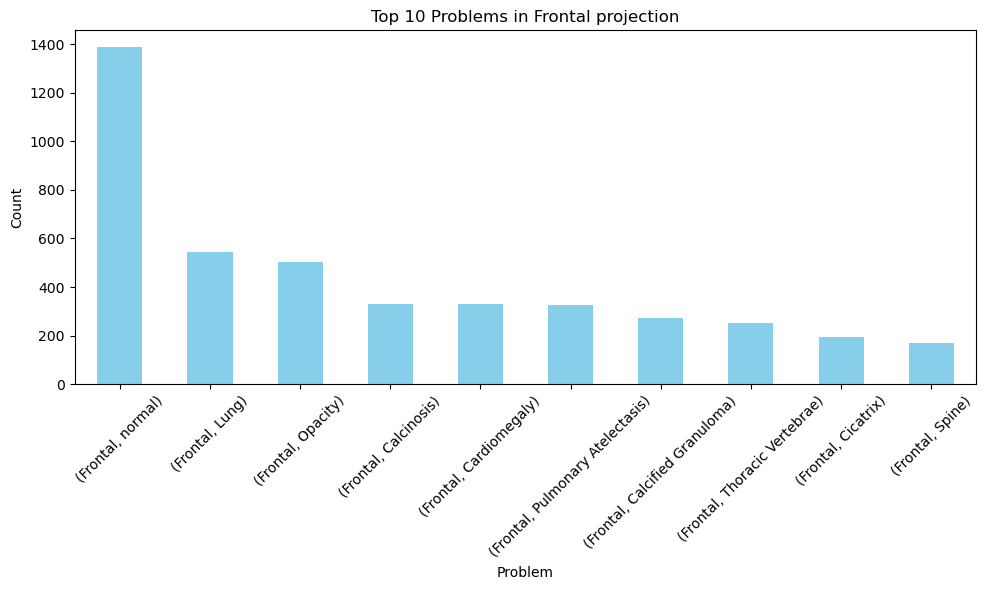

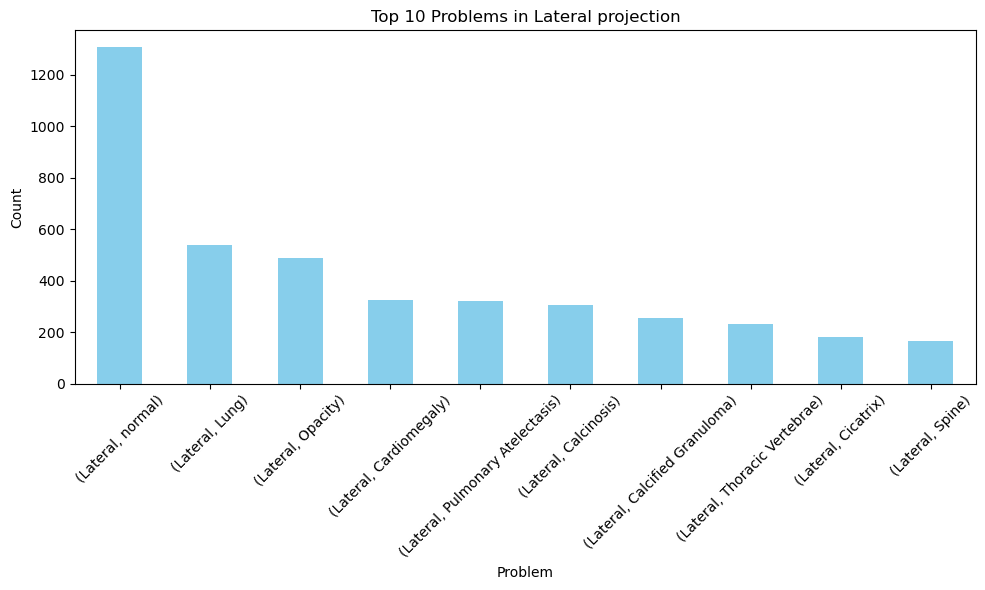

In [69]:
import matplotlib.pyplot as plt

# 'merged_df'가 이미 정의되어 있다고 가정합니다.
# 'problems_by_projection'을 생성하는 코드
problems_by_projection = merged_df.groupby('projection')['Problems'].apply(
    lambda x: x.str.split(';').explode().value_counts()
)

# 각 projection별로 top 10 문제만 추출하고 그래프 그리기
for projection, problem_counts in problems_by_projection.groupby(level=0):
    top_10 = problem_counts.head(10)  # 상위 10개 문제만 선택
    plt.figure(figsize=(10, 6))
    top_10.plot(kind='bar', color='skyblue')
    plt.title(f"Top 10 Problems in {projection} projection")
    plt.xlabel('Problem')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


--------------------------------------------------
# 분석결과:

## 투영 방식별 분포:

#### 앞면 이미지: 3818개
#### 옆면 이미지: 3648개<br>

## 주요 문제(Problems):
#### normal(정상): 2695건
#### Lung(폐): 1083건
#### Opacity(불투명도): 988건
#### Cardiomegaly(심비대): 655건
#### Pulmonary Atelectasis(폐기종): 645건<br>

## 방식에 따른 문제 분포:
#### 앞면 이미지에서는 정상, 폐, 불투명도가 주요 문제
#### 옆면 이미지에서는 앞면 이미지와 같은 분포를 이룸. 그러나 주요 문제에서는 적은 분포를 이룸.
#### thoracic vertebare(흉추),bronchitis(기관지염),trachea(기관)와 carina(기관 분기),colonic interposition(결장 이식),hemothorax(혈흉)등이 1건<br>

## 결론 
#### 앞면: 일반적인 폐 및 심장 질환을 관찰하고 진단하는 데 유용.
#### 옆면: 보완적인 정보를 제공하며, 앞면에서 관찰하기 어려운 특수 문제(척추, 기관지 등)를 확인.

-----------------------------------------------------------------------------------------------------------

## 1-4.문제(Problems)와 투영 방식 간의 분포 시각화:
#### 투영 방식(Frontal, Lateral)에 따른 주요 문제의 빈도를 시각화

## 문제 상관관계 분석:
#### 자주 함께 발견되는 문제들을 분석하여 상관관계를 시각화.

## 최종 진단(Impression) 빈도 분석 및 시각화:
#### 최종 진단의 상위 빈도를 시각화.

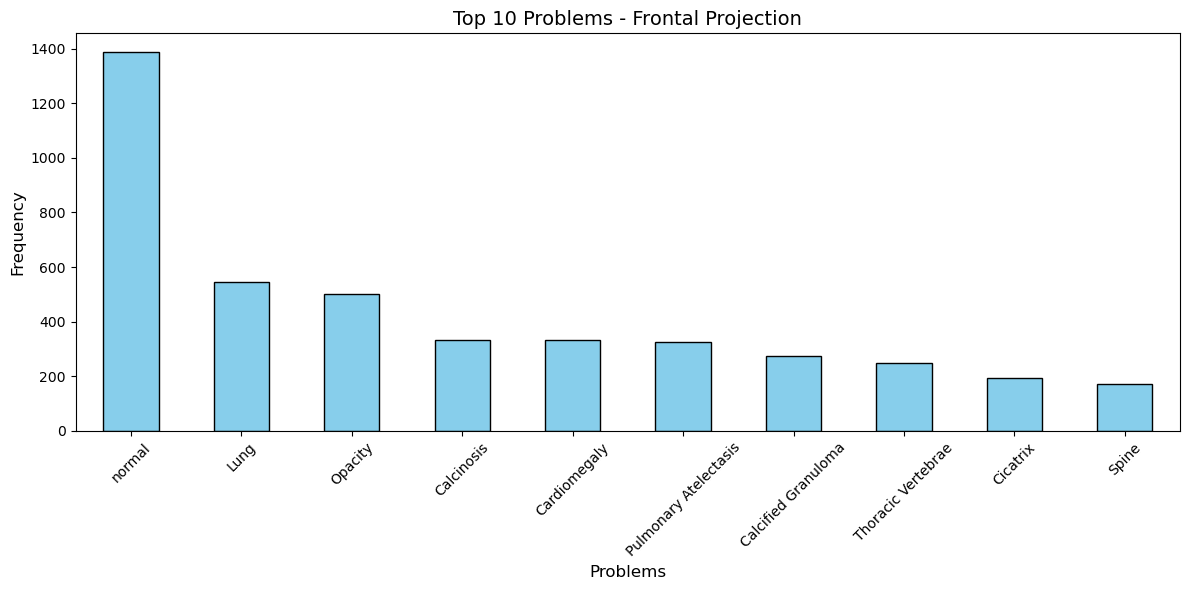

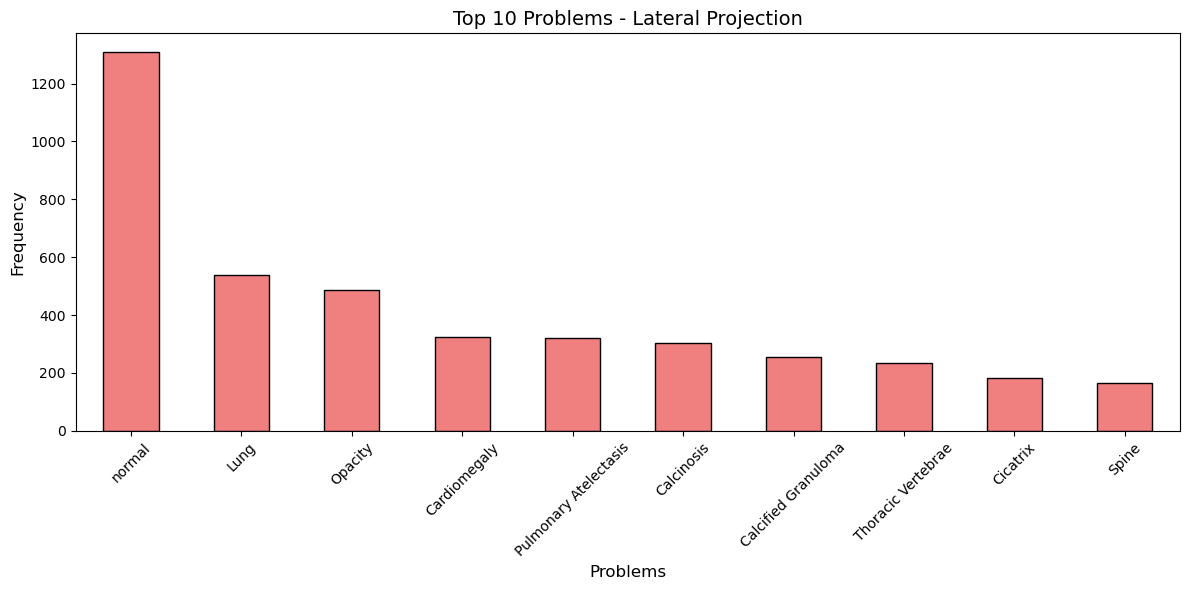

In [120]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter and prepare data
top_problems = problems_counts.head(10).index
filtered_df = merged_df[merged_df['Problems'].notnull()]
filtered_df['Problems_list'] = filtered_df['Problems'].str.split(';')

# Extract Frontal and Lateral counts for top problems
problem_projection_counts = filtered_df.explode('Problems_list').query(
    "Problems_list in @top_problems"
).groupby(['projection', 'Problems_list']).size().unstack(fill_value=0)

# Extract Frontal and Lateral data separately
filtered_df_1 = filtered_df.explode('Problems_list')
filtered_df_1 = filtered_df_1[filtered_df_1['Problems_list'].isin(top_problems)]

# Separate data for Frontal and Lateral projections
frontal_counts = filtered_df_1[filtered_df_1['projection'] == 'Frontal'].groupby('Problems_list').size().sort_values(ascending=False)
lateral_counts = filtered_df_1[filtered_df_1['projection'] == 'Lateral'].groupby('Problems_list').size().sort_values(ascending=False)

# Plot for Frontal projection
plt.figure(figsize=(12, 6))
frontal_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Top 10 Problems - Frontal Projection', fontsize=14)
plt.ylabel('Frequency', fontsize=12)
plt.xlabel('Problems', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()
plt.show()

# Plot for Lateral projection
plt.figure(figsize=(12, 6))
lateral_counts.plot(kind='bar', color='lightcoral', edgecolor='black')
plt.title('Top 10 Problems - Lateral Projection', fontsize=14)
plt.ylabel('Frequency', fontsize=12)
plt.xlabel('Problems', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()
plt.show()


C:\Users\PC\AppData\Local\Temp\ipykernel_4912\2029435008.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_co_occurrence_df['Count'], y=top_co_occurrence_df['Pair'].astype(str), palette='viridis')


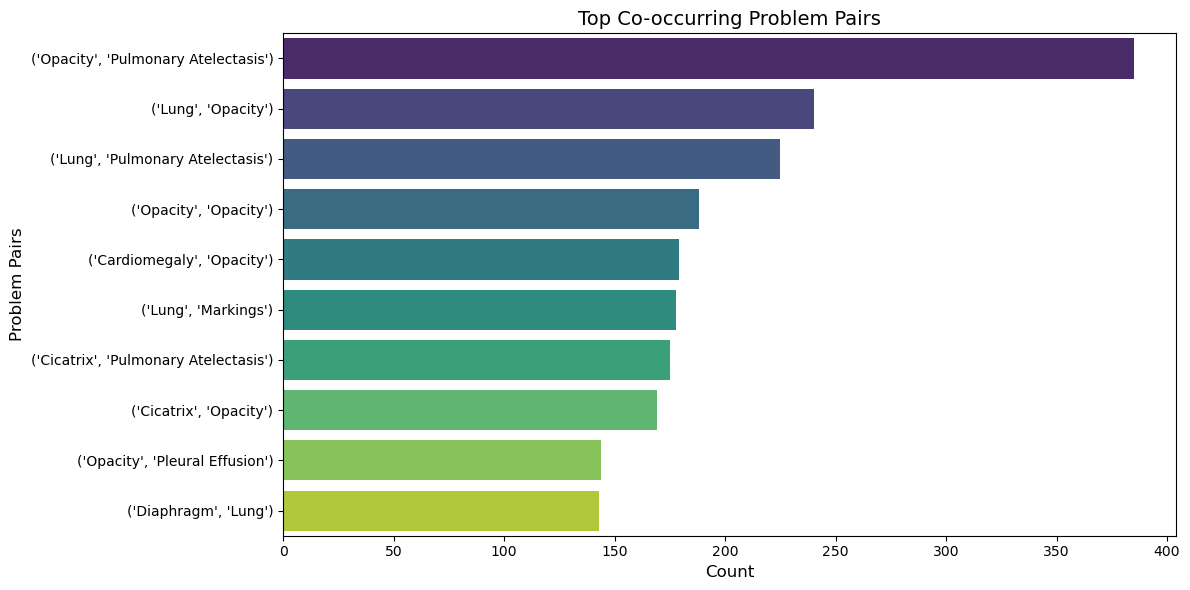

In [122]:
# Co-occurrence analysis of problems
from itertools import combinations
from collections import Counter

# Count co-occurrence of problems
co_occurrence = Counter(
    comb
    for problems in filtered_df['Problems_list']
    for comb in combinations(sorted(problems), 2)
)

# Convert to DataFrame for visualization
co_occurrence_df = pd.DataFrame(co_occurrence.items(), columns=['Pair', 'Count']).sort_values(by='Count', ascending=False)

# Top co-occurring pairs
top_co_occurrence_df = co_occurrence_df.head(10)

# Plot co-occurrence
plt.figure(figsize=(12, 6))
sns.barplot(x=top_co_occurrence_df['Count'], y=top_co_occurrence_df['Pair'].astype(str), palette='viridis')
plt.title('Top Co-occurring Problem Pairs', fontsize=14)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Problem Pairs', fontsize=12)
plt.tight_layout()
plt.show()

#### - 3개 이상의 상관관계 분석

C:\Users\PC\AppData\Local\Temp\ipykernel_4912\3211856002.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


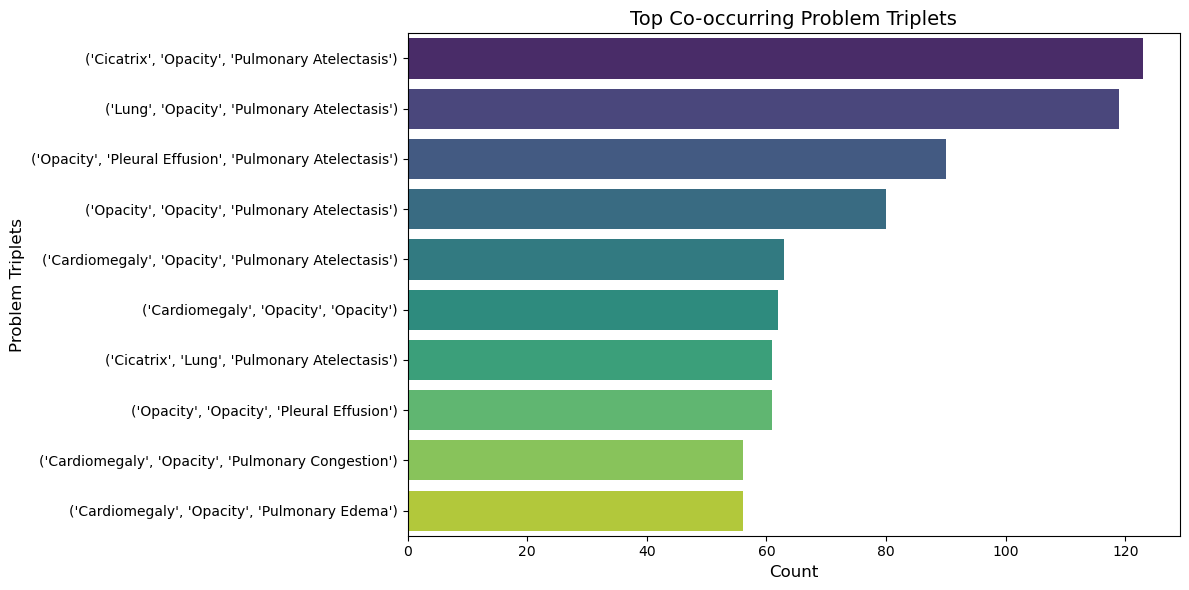

C:\Users\PC\AppData\Local\Temp\ipykernel_4912\3211856002.py:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


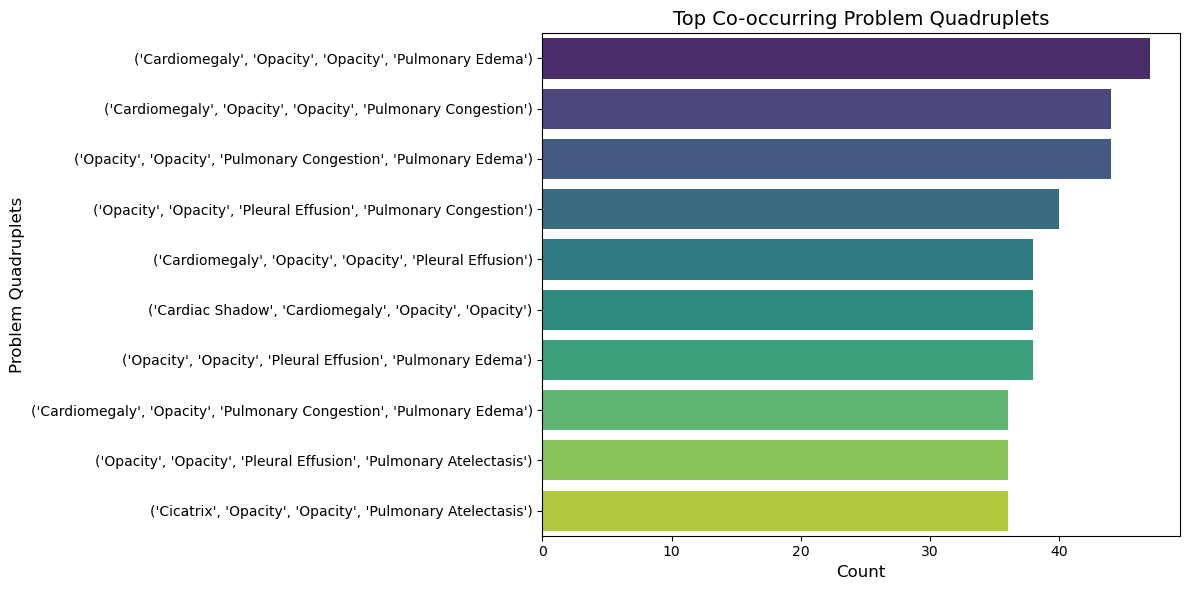

C:\Users\PC\AppData\Local\Temp\ipykernel_4912\3211856002.py:94: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


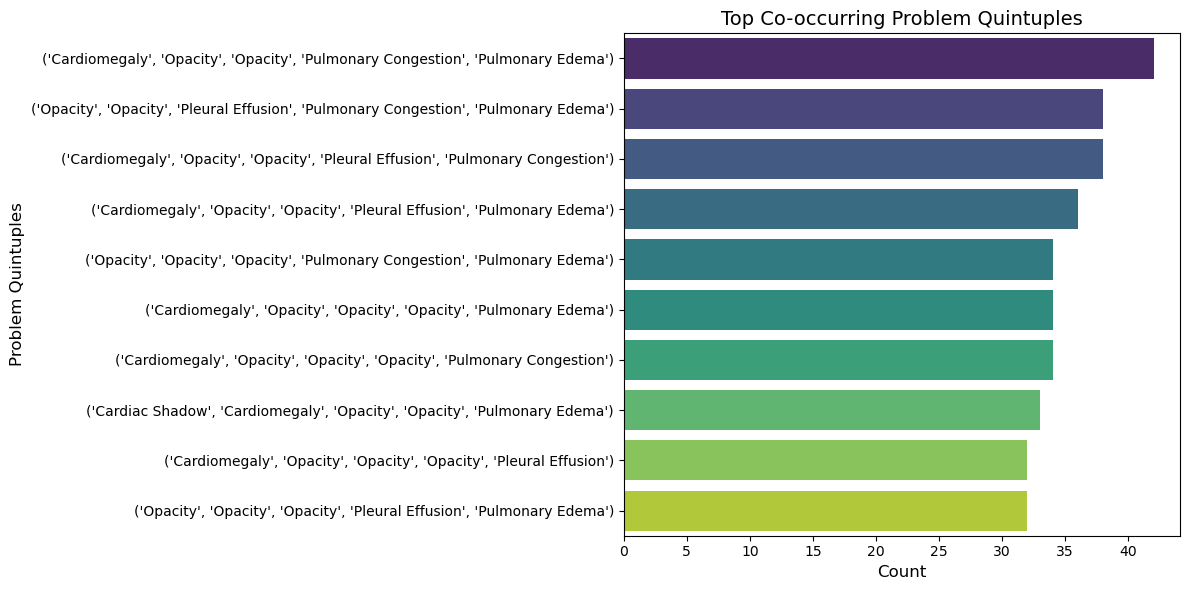

In [132]:
from itertools import combinations
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Count co-occurrence of problems (triplets)
co_occurrence_triplets = Counter(
    comb
    for problems in filtered_df['Problems_list']
    for comb in combinations(sorted(problems), 3)
)

# Convert to DataFrame for visualization
co_occurrence_triplets_df = pd.DataFrame(
    co_occurrence_triplets.items(), columns=['Triplet', 'Count']
).sort_values(by='Count', ascending=False)

# Top co-occurring triplets
top_co_occurrence_triplets_df = co_occurrence_triplets_df.head(10)

# Plot co-occurrence (triplets)
plt.figure(figsize=(12, 6))
sns.barplot(
    x=top_co_occurrence_triplets_df['Count'],
    y=top_co_occurrence_triplets_df['Triplet'].astype(str),
    palette='viridis'
)
plt.title('Top Co-occurring Problem Triplets', fontsize=14)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Problem Triplets', fontsize=12)
plt.tight_layout()
plt.show()


from itertools import combinations
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Count co-occurrence of problems (quadruplets)
co_occurrence_quadruplets = Counter(
    comb
    for problems in filtered_df['Problems_list']
    for comb in combinations(sorted(problems), 4)
)

# Convert to DataFrame for visualization
co_occurrence_quadruplets_df = pd.DataFrame(
    co_occurrence_quadruplets.items(), columns=['Quadruplet', 'Count']
).sort_values(by='Count', ascending=False)

# Top co-occurring quadruplets
top_co_occurrence_quadruplets_df = co_occurrence_quadruplets_df.head(10)

# Plot co-occurrence (quadruplets)
plt.figure(figsize=(12, 6))
sns.barplot(
    x=top_co_occurrence_quadruplets_df['Count'],
    y=top_co_occurrence_quadruplets_df['Quadruplet'].astype(str),
    palette='viridis'
)
plt.title('Top Co-occurring Problem Quadruplets', fontsize=14)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Problem Quadruplets', fontsize=12)
plt.tight_layout()
plt.show()


from itertools import combinations
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Count co-occurrence of problems (quintuples)
co_occurrence_quintuples = Counter(
    comb
    for problems in filtered_df['Problems_list']
    for comb in combinations(sorted(problems), 5)
)

# Convert to DataFrame for visualization
co_occurrence_quintuples_df = pd.DataFrame(
    co_occurrence_quintuples.items(), columns=['Quintuple', 'Count']
).sort_values(by='Count', ascending=False)

# Top co-occurring quintuples
top_co_occurrence_quintuples_df = co_occurrence_quintuples_df.head(10)

# Plot co-occurrence (quintuples)
plt.figure(figsize=(12, 6))
sns.barplot(
    x=top_co_occurrence_quintuples_df['Count'],
    y=top_co_occurrence_quintuples_df['Quintuple'].astype(str),
    palette='viridis'
)
plt.title('Top Co-occurring Problem Quintuples', fontsize=14)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Problem Quintuples', fontsize=12)
plt.tight_layout()
plt.show()


### 결론:최대 5개로 묶어서 상관관계 분석한 결과 두개로 묶었을때가 상관성을 명확히 보여주고 직관적인 것을 알 수 있습니다.

C:\Users\PC\AppData\Local\Temp\ipykernel_4912\807389930.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=impression_counts.values, y=impression_counts.index, palette='mako')


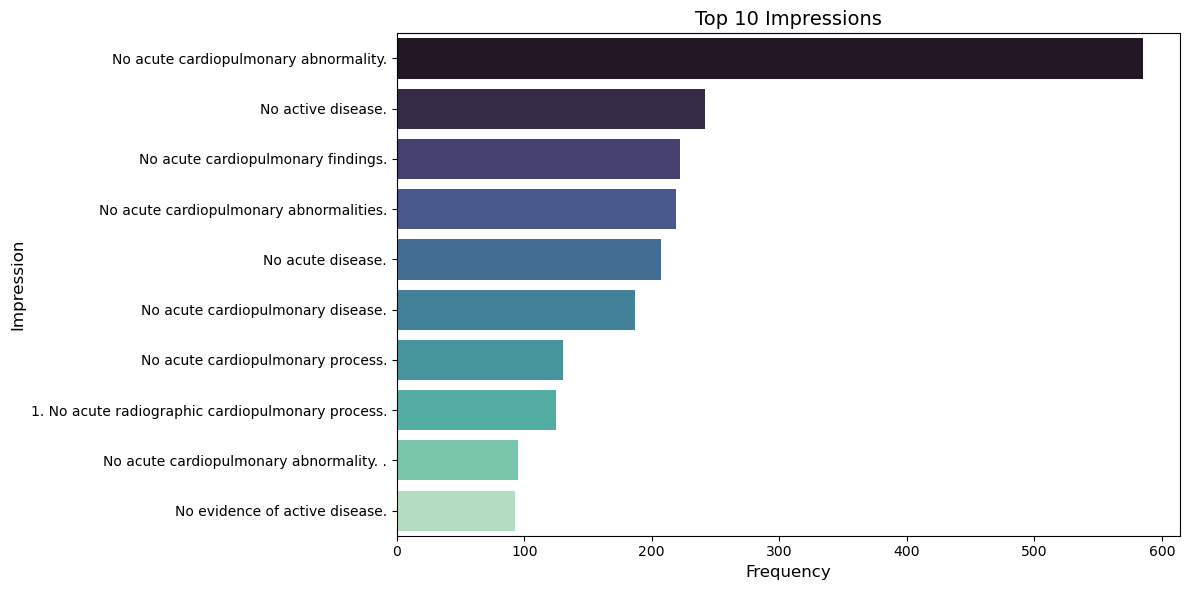

In [124]:

# Analyze top impressions
impression_counts = merged_df['impression'].value_counts().head(10)

# Plot impressions
plt.figure(figsize=(12, 6))
sns.barplot(x=impression_counts.values, y=impression_counts.index, palette='mako')
plt.title('Top 10 Impressions', fontsize=14)
plt.xlabel('Frequency', fontsize=12)
plt.ylabel('Impression', fontsize=12)
plt.tight_layout()
plt.show()

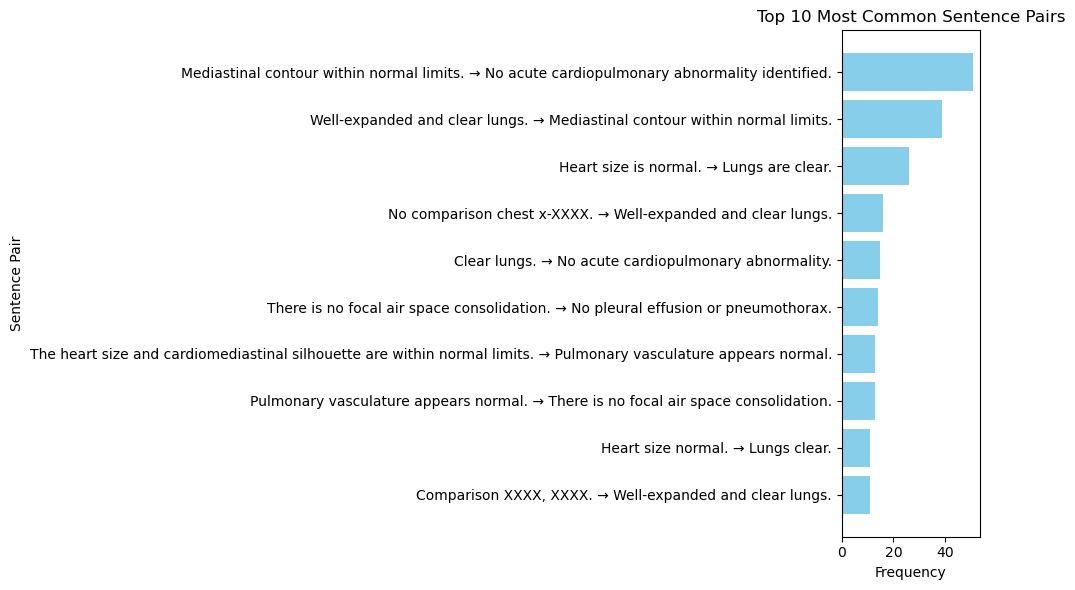

In [26]:
import re

# Extract the 'impression' column
impressions = data['impression'].dropna()  # Remove any NaN entries

# Function to split text into sentences
def split_into_sentences(text):
    return re.split(r'(?<!\w\.\w.)(?<![A-Z][a-z]\.)(?<=\.|\?)\s', text)

# Process each impression, splitting into sentences and forming pairs
sentence_pairs = []
for impression in impressions:
    sentences = split_into_sentences(impression)
    # Remove sentences that are only "."
    sentences = [s for s in sentences if s.strip() != "."]
    pairs = [(sentences[i], sentences[i+1]) for i in range(len(sentences) - 1)]
    sentence_pairs.extend(pairs)

# Function to remove numerical markers (e.g., "1.", "2.")
def remove_numerical_markers(sentence):
    return re.sub(r'^\d+\.\s*', '', sentence).strip()

# Update sentence pairs by removing numerical markers and filtering out "."
cleaned_sentence_pairs = []
for s1, s2 in sentence_pairs:
    cleaned_s1 = remove_numerical_markers(s1)
    cleaned_s2 = remove_numerical_markers(s2)
    if cleaned_s1 and cleaned_s2 and cleaned_s1 != "." and cleaned_s2 != ".":  # Remove empty or "." sentences
        cleaned_sentence_pairs.append((cleaned_s1, cleaned_s2))

# Display a sample of the cleaned sentence pairs
cleaned_sentence_pairs[:10]


import matplotlib.pyplot as plt
from collections import Counter

# Count the frequency of each unique sentence pair
pair_counter = Counter(cleaned_sentence_pairs)

# Get the top 10 most common sentence pairs
top_10_pairs = pair_counter.most_common(10)

# Prepare data for plotting
labels = [f"{pair[0][0]} → {pair[0][1]}" for pair in top_10_pairs]
counts = [pair[1] for pair in top_10_pairs]

# Plotting the top 10 sentence pairs
plt.figure(figsize=(10, 6))
plt.barh(labels, counts, color='skyblue')
plt.xlabel("Frequency")
plt.ylabel("Sentence Pair")
plt.title("Top 10 Most Common Sentence Pairs")
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.tight_layout()
plt.show()


### impression 항목의 상관관계 분석한 결과
#### -> 표본이 40개이상인 항목은 mediastinal contour within normal limits.->no acute cardiplumonary banormality identified.
#### (종격동 윤곽은 정상 범위 내에 있습니다. -> 급성 심폐 이상은 확인되지 않았습니다.")<br>
#### 그래서 imprssion은 상관관계 분석에 적절치 않다.

-----------------------------------------------------------------------------------------------------------
# 분석결과:
## 투영 방식별 주요 문제 분포:
#### rontal과 Lateral 모두에서 공통적으로 많이 나타나는 문제는 normal(정상), Lung(폐), Opacity(불투명도) 등입니다.
#### 일부 문제는 특정 투영 방식에서 더 자주 나타나는 경향이 보입니다.

## 문제의 상관관계 분석:
#### 자주 함께 발견되는 문제 쌍의 상위 10개를 분석한 결과, 특정 문제들이 서로 연관되어 발생하는 경향이 있습니다.
#### 예: Lung(폐)과 Opacity(불투명도)의 빈도가 2번째로 높습니다.

## 최종 진단(Impression) 빈도:
#### 상위 10개의 진단 결과 중 대부분이 "정상"에 해당하거나 경미한 소견을 나타냅니다.
#### 이는 주로 "Normal chest x-ray"(정상)와 같은 진단이 빈번하다는 점을 보여줍니다.